In [50]:
import jax.numpy as jnp
import jax
from jax.typing import ArrayLike
import numpy as np
from typing import Union, Optional

In [49]:
def newton_rapson_1d(f: callable, x0: float, tol: float = 1e-6, max_iter: int = 100):
    grad_f = jax.jit(jax.grad(f))
    x = x0
    for _ in range(max_iter):
        x = x - f(x) / grad_f(x)
        if jnp.abs(f(x)) < tol:
            return x, f(x)

    raise RuntimeError("Failed to converge, max iterations exceeded")


def newton_rapson_nd(
    f: callable, x0: ArrayLike, tol: float = 1e-6, max_iter: int = 100
):
    jacob_f = jax.jit(jax.jacfwd(f))
    x = x0.copy()

    for _ in range(max_iter):
        x = x - jnp.linalg.solve(jacob_f(x), f(x))
        if jnp.linalg.norm(f(x)) < tol:
            return x, f(x)

    raise RuntimeError("Failed to converge, max iterations exceeded")

In [33]:
def newton_rapson(
    f: callable, x0: Union[float, ArrayLike], tol: float = 1e-6, max_iter: int = 100
):
    if isinstance(x0, float):
        return newton_rapson_1d(f, x0, tol, max_iter)
    else:
        return newton_rapson_nd(f, x0, tol, max_iter)

In [24]:
@jax.jit
def f1(x):
    return x**3 - 6 * x**2 + 11 * x - 6


@jax.jit
def f2(x):
    return jnp.exp(x) - 3 * x


@jax.jit
def f3(x):
    return jnp.cos(x) - x


# Two-dimensional examples
@jax.jit
def f4(x):
    return jnp.array([x[0] ** 2 + x[1] ** 2 - 4, x[0] * x[1] - 1])


@jax.jit
def f5(x):
    return jnp.array([x[0] ** 2 - x[1], x[0] ** 2 + x[1] ** 2 - 5])

In [25]:
root1 = newton_rapson_1d(f1, 0.0)
root2 = newton_rapson_1d(f2, 0.0)
root3 = newton_rapson_1d(f3, 0.0)

In [35]:
root4 = newton_rapson_2d(f4, jnp.array([3.0, 1.0]))
root5 = newton_rapson_2d(f5, jnp.array([3.0, 1.0]))

In [36]:
print(
    f"The root found by Newton-Rapson method is: {root1[0]}, the value of f1 is {root1[1]}"
)
print(
    f"The root found by Newton-Rapson method is: {root2[0]}, the value of f2 is {root2[1]}"
)
print(
    f"The root found by Newton-Rapson method is: {root3[0]}, the value of f3 is {root3[1]}"
)
print(
    f"The root found by Newton-Rapson method is: {root4[0]}, the value of f4 is {root4[1]}"
)
print(
    f"The root found by Newton-Rapson method is: {root5[0]}, the value of f5 is {root5[1]}"
)

The root found by Newton-Rapson method is: 0.9999999403953552, the value of f1 is 4.76837158203125e-07
The root found by Newton-Rapson method is: 0.619061291217804, the value of f2 is -5.960464477539063e-08
The root found by Newton-Rapson method is: 0.7390851378440857, the value of f3 is 0.0
The root found by Newton-Rapson method is: [1.9318516 0.5176381], the value of f4 is [ 0.0000000e+00 -1.9711393e-08]
The root found by Newton-Rapson method is: [-1.3076605 -1.709976 ], the value of f5 is [-1.1920929e-07 -4.3629419e-07]


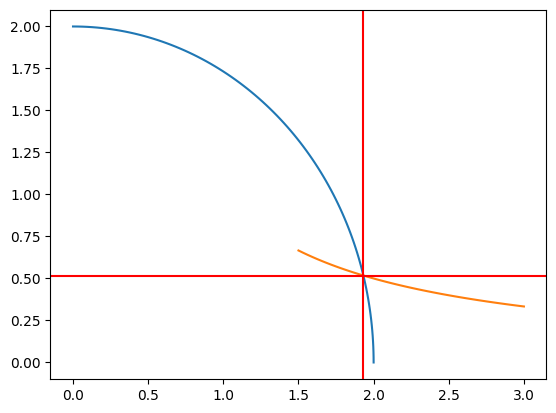

In [60]:
import matplotlib.pyplot as plt

t = np.linspace(0, np.pi / 2, 100)
x = np.linspace(1.5, 3)
plt.plot(2 * np.cos(t), 2 * np.sin(t))
plt.plot(x, 1 / x)

plt.axvline(x=root4[0][0], color="r")
plt.axhline(y=root4[0][1], color="r")

In [64]:
def nmf(V, k, max_iter=100, tol=1e-10):
    m, n = V.shape
    # Initialize W and H with random nonnegative values
    W = np.abs(np.random.randn(m, k))
    H = np.abs(np.random.randn(k, n))
    for _ in range(max_iter):
        
        H = H * (W.T @ V) / (W.T @ W @ H)
        W = W * (V @ H.T) / (W @ H @ H.T)
        
        # Convergence check
        if np.linalg.norm(V - W @ H) < tol:
            break
    return W, H

In [66]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

np.random.seed(0)
# Sample corpus (collection of documents)
corpus = [
    "Apple releases new iPhone",
    "Samsung announces Galaxy phone",
    "Apple and Samsung compete in the smartphone market",
    "NASA launches new satellite",
    "SpaceX sends astronauts to the space station",
    "Apple and NASA collaborate on space technology"
]

# Convert the corpus into a term-document matrix using TF-IDF weighting
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

# Apply NMF
# Assume there are three topics
W, H = nmf(X, k=3)

# Print the most significant terms for each topic
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(H):
    print(f"Topic {i+1}:")
    print(" ".join([terms[j] for j in topic.argsort()[-5:]]))
    print()

# For each document, print the most significant topic
for i, doc in enumerate(corpus):
    print(f"Document {i+1} ({doc}) is mostly about Topic {np.argmax(W[i])+1}")
    print()

Topic 1:
smartphone galaxy phone announces samsung

Topic 2:
station astronauts sends spacex space

Topic 3:
iphone releases satellite launches new

Document 1 (Apple releases new iPhone) is mostly about Topic 3

Document 2 (Samsung announces Galaxy phone) is mostly about Topic 1

Document 3 (Apple and Samsung compete in the smartphone market) is mostly about Topic 1

Document 4 (NASA launches new satellite) is mostly about Topic 3

Document 5 (SpaceX sends astronauts to the space station) is mostly about Topic 2

Document 6 (Apple and NASA collaborate on space technology) is mostly about Topic 2

